<a href="https://colab.research.google.com/github/yazhinil/FMML20230017/blob/main/Module%2001%20Lab%2003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
rng = np.random.default_rng(seed=42)
from sklearn.utils.extmath import cartesian
from skimage.transform import rotate, AffineTransform, warp
import math


(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255
test_X = test_X/255

train_X = train_X[::1200,:,:].copy()
train_y = train_y[::1200].copy()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

def NN(traindata, trainlabel, testdata):
  traindata = traindata.reshape(-1, 28*28)
  testdata = testdata.reshape(-1,28*28)
  predlabel = np.array([NN1(traindata, trainlabel, i) for i in testdata])
  return predlabel

def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

Q1.

In [ ]:
testpred = NN(train_X, train_y, test_X)
print('Baseline accuracy without augmentation is ', Accuracy(test_y, testpred))

Baseline accuracy without augmentation is  0.6472


In [ ]:
def augRotate(sample, angleconstraint):
  if angleconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  angle = rng.random(len(sample))
  angle = (angle-0.5)*angleconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(sample[ii], angle[ii])
  return np.squeeze(nsample)

In [ ]:
angleconstraints = [0,10,20,30,40,50,60,70,80,90]
accuracies = np.zeros(len(angleconstraints), dtype=np.float)

for ii in range(len(angleconstraints)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotate(train_X, angleconstraints[ii])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after rotation augmentation constrained by ',angleconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-9-2f14d3721156>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(angleconstraints), dtype=np.float) # we will save the values here


Accuracy after rotation augmentation constrained by  0  is  0.6472
Accuracy after rotation augmentation constrained by  10  is  0.6727
Accuracy after rotation augmentation constrained by  20  is  0.673
Accuracy after rotation augmentation constrained by  30  is  0.6737
Accuracy after rotation augmentation constrained by  40  is  0.6731
Accuracy after rotation augmentation constrained by  50  is  0.6701
Accuracy after rotation augmentation constrained by  60  is  0.6675
Accuracy after rotation augmentation constrained by  70  is  0.661
Accuracy after rotation augmentation constrained by  80  is  0.6462
Accuracy after rotation augmentation constrained by  90  is  0.6469


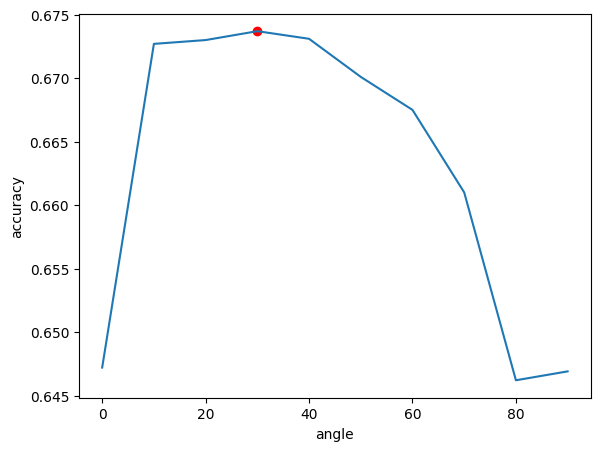

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.plot(angleconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')
maxind = np.argmax(accuracies)
plt.scatter(angleconstraints[maxind], accuracies[maxind], c='red')

In [ ]:
def shear(sample, amount):
  tform = AffineTransform(shear = amount)
  img = warp(sample, tform)
  col = img.sum(0).nonzero()[0]
  row = img.sum(1).nonzero()[0]
  if len(col)>0 and len(row)>0:
    xshift = int(sample.shape[0]/2 - (row[0]+row[-1])/2)
    yshift = int(sample.shape[1]/2 - (col[0]+col[-1])/2)
    img = np.roll(img, (xshift, yshift),(0,1))
  return img

In [ ]:
def augShear(sample, shearconstraint):
  if shearconstraint==0:
    return sample
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.5)*shearconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = shear(sample[ii], amt[ii])
  return np.squeeze(nsample)

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0]
accuracies = np.zeros(len(shearconstraints), dtype=np.float)

for ii in range(len(shearconstraints)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augShear(train_X, shearconstraints[ii])))
    auglabel = np.concatenate((auglabel, train_y))

  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after shear augmentation constrained by ',shearconstraints[ii], ' is ', accuracies[ii], flush=True)

<ipython-input-17-8a89fef4983d>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(shearconstraints), dtype=np.float) # we will save the values here


Accuracy after shear augmentation constrained by  0  is  0.6472
Accuracy after shear augmentation constrained by  0.2  is  0.6147
Accuracy after shear augmentation constrained by  0.4  is  0.632
Accuracy after shear augmentation constrained by  0.6  is  0.6351
Accuracy after shear augmentation constrained by  0.8  is  0.6636
Accuracy after shear augmentation constrained by  1.0  is  0.6652
Accuracy after shear augmentation constrained by  1.2  is  0.6495
Accuracy after shear augmentation constrained by  1.4  is  0.6181
Accuracy after shear augmentation constrained by  1.6  is  0.6323
Accuracy after shear augmentation constrained by  1.8  is  0.6432
Accuracy after shear augmentation constrained by  2.0  is  0.6277


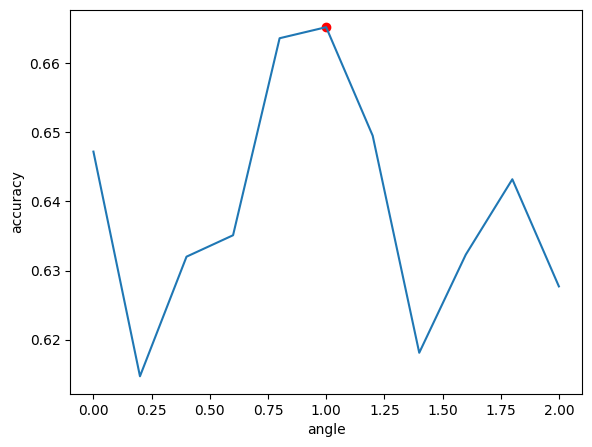

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

ax.plot(shearconstraints, accuracies)
ax.set_xlabel('angle')
ax.set_ylabel('accuracy')

maxind = np.argmax(accuracies)
plt.scatter(shearconstraints[maxind], accuracies[maxind], c='red')

Q1. The best value for accuracy is 0.6737 after rotation augmentation.
The best value for accuracy is 0.6652 after shear augmentation.
The accuracy without using augmentations is 0.6472.
This shows that the accuracy has increased as compared to not using augmentations.

In [ ]:
#Q2. For sample 50.

angleconstraint = 50
naugmentations = 7


augdata = train_X
auglabel = train_y
for ii in range(naugmentations):
  augdata = np.concatenate((augdata, augRotate(train_X, angleconstraint)))
  auglabel = np.concatenate((auglabel, train_y))

testpred = NN(augdata, auglabel, test_X)
print('Accuracy after rotation augmentation is ', Accuracy(test_y, testpred))

Accuracy after rotation augmentation is  0.677


Q2. By increasing the number of augumentations to 7, the accuracy of sample value 50 has also increased from 0.6701 to 0.677.

In [ ]:
def augRotateShear(sample, angleconstraint, shearconstraint):
  if len(sample.shape)==2:
    sample = np.expand_dims(sample, 0)
  amt = rng.random(len(sample))
  amt = (amt-0.5)*shearconstraint
  angle = rng.random(len(sample))
  angle = (angle-0.5)*angleconstraint
  nsample = sample.copy()
  for ii in range(len(sample)):
    nsample[ii] = rotate(shear(sample[ii], amt[ii]), angle[ii])
  return np.squeeze(nsample)

Q4. Combining rotational and shear augmentations.

In [ ]:
shearconstraints = [0, 0.2,0.4,0.6,0.8,1.0,1.2,1.4,1.6]
angleconstraints = [0,10,20,30,40,50,60]
hyp = cartesian((shearconstraints, angleconstraints))

accuracies = np.zeros(len(hyp), dtype=np.float)

for ii in range(len(hyp)):
  augdata = train_X
  auglabel = train_y
  for jj in range(naugmentations):
    augdata = np.concatenate((augdata, augRotateShear(train_X, hyp[ii][0], hyp[ii][1])))
    auglabel = np.concatenate((auglabel, train_y))


  testpred = NN(augdata, auglabel, test_X)
  accuracies[ii] = Accuracy(test_y, testpred)
  print('Accuracy after augmentation shear:',hyp[ii][0], 'angle:',hyp[ii][1], ' is ', accuracies[ii], flush=True)

<ipython-input-23-09de780976d0>:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  accuracies = np.zeros(len(hyp), dtype=np.float) # we will save the values here


Accuracy after augmentation shear: 0.0 angle: 0.0  is  0.6332
Accuracy after augmentation shear: 0.0 angle: 10.0  is  0.6032
Accuracy after augmentation shear: 0.0 angle: 20.0  is  0.5966
Accuracy after augmentation shear: 0.0 angle: 30.0  is  0.5878
Accuracy after augmentation shear: 0.0 angle: 40.0  is  0.6112
Accuracy after augmentation shear: 0.0 angle: 50.0  is  0.601
Accuracy after augmentation shear: 0.0 angle: 60.0  is  0.6123
Accuracy after augmentation shear: 0.2 angle: 0.0  is  0.6335
Accuracy after augmentation shear: 0.2 angle: 10.0  is  0.605
Accuracy after augmentation shear: 0.2 angle: 20.0  is  0.5804
Accuracy after augmentation shear: 0.2 angle: 30.0  is  0.6003
Accuracy after augmentation shear: 0.2 angle: 40.0  is  0.6165
Accuracy after augmentation shear: 0.2 angle: 50.0  is  0.5919
Accuracy after augmentation shear: 0.2 angle: 60.0  is  0.6046
Accuracy after augmentation shear: 0.4 angle: 0.0  is  0.6346
Accuracy after augmentation shear: 0.4 angle: 10.0  is  0.61

0.6355

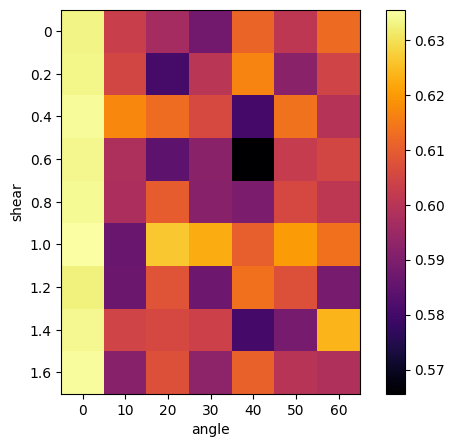

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
im = ax.imshow(accuracies.reshape((len(shearconstraints), len(angleconstraints))), cmap='inferno')
ax.set_xlabel('angle')
ax.set_ylabel('shear')
ax.set_xticks(np.arange(len(angleconstraints)));
ax.set_xticklabels(angleconstraints);
ax.set_yticks(np.arange(len(shearconstraints)));
ax.set_yticklabels(shearconstraints);
plt.colorbar(im)
maxind = np.argmax(accuracies)
accuracies[maxind]

The highest accuracy is 0.6355.